# Workshop Task - Training models and preprocessing


We have classification problem where we have to predict whether a credit would be approved or not for a client.


|Field Name|	Order|	Type (Format)|Description|
| -------| -------|-----------|---------|
|checking_status|	1|	string (default)|Status of existing checking account, in Deutsche Mark.|	
|duration	|2|	number (default)	|Duration in months|
|credit_history	|3|	string (default)	|Credit history (credits taken, paid back duly, delays, critical accounts)|
|purpose	|4|	string (default)	|Purpose of the credit (car, television,…)|
|credit_amount	|5|	number (default)	|Credit amount|
|savings_status	|6|	string (default)	|Status of savings account/bonds, in Deutsche Mark.|
|employment	|7|	string (default)	|Present employment, in number of years.|
|installment_commitment	|8|	number (default)|Installment rate in percentage of disposable income|	
|personal_status	|9|	string (default)|Personal status (married, single,…) and sex|
|other_parties	|10|	string (default)|Other debtors / guarantors|	
|residence_since	|11|	number (default)|Present residence since X years|	
|property_magnitude	|12|	string (default)|Property (e.g. real estate)|	
|age	|13|	number (default)	|Age in years|
|other_payment_plans	|14|	string (default)|Other installment plans (banks, stores)|
|housing	|15|	string (default)	|Housing (rent, own,…)|
|existing_credits	|16|	number (default)|Number of existing credits at this bank|	
|job	|17|	string (default)	|Job|
|num_dependents	|18|	number (default)|Number of people being liable to provide maintenance for|	
|own_telephone	|19|	string (default)|Telephone (yes,no)|	
|foreign_worker	|20|	string (default)|Foreign worker (yes,no)|	
accepted	|21|	string (default)	|Class|


Your task is to : 
  1. Use some EDA techniques we learned this week   
  2. Using Univariate variable analysis, detect what is wrong with the following features : 
      - change_purpose
      - change_duration
      - checking_status
      - personal_status  
    Hint : use dataframe['feature'].unique()
  3. Fix the problems on the features above 
      - hint : Use df.replace from pandas, and df.apply
  4. Detect skewed distribution on a numeric variable :
      - Use log/sqrt transformation on at least one variable with skewed distribution
      - hint : use np.log() or np.sqrt()
  5. Detect missing values and handle them
      * Warning : there are 2 missing type of values
      * hint : dataset = dataset.replace('missing_value', np.nan)

  6. Use Catboost Encoding (Count Encoding, Target Encoding) and compare the performance with One-Hot Encoding
  
  7. Scale the numeric data (some of them)
  
  8. Make train/test split : with train(70%), test(30%) with random_state = 0

  9. Train the model
  
  10. Evaluate the model
  
  11. Achieve accuracy on test set >=0.90
  
  12. For reproducibility please use random_state on train_test_split and model initialization
  
  13. Write a summary :
    - Which model gives the best result?
    - What can we improve in the future?
    - Which encoding give better performance on this dataset (CatBoost or One-Hot)?
    
Bonus points : 
* Add precision/recall evaluation

* Hint : use:  from sklearn.metrics import classification_report

----------------------------
General Support : 
For converting feature to numeric value use :
pd.to_numeric(dataset[feature], errors='coerce')



In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('dataset-workshop.csv')

In [4]:
dataset.head(10)

,Unnamed: 0,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
0,0,0_checking,6,Critical_acct_other_credits_existing,radio/television,3380.000000,Unknown_or_no_savings_acct,>7yrs,4,male_single,...,real_estate,NaN,none,own,2,skilled_employee/official,1,yes,yes,0
1,1,from_0_to_200,48,Existing_credits_paid_till_now,radio/television,6940.208336,<100DM,1_to_4yrs,2,female_divorced/separated/married,...,real_estate,22.0,none,own,1,skilled_employee/official,1,none,yes,1
2,2,None,12,Critical_acct_other_credits_existing,education,1902.370483,<100DM,4_to_7yrs,2,male_single,...,real_estate,49.0,none,own,1,unskilled_resident,2,none,yes,0
3,3,0_checking,42,Existing_credits_paid_till_now,furniture/equipment,1097.000000,<100DM,4_to_7yrs,2,male_single,...,building_society_savings_agreement/life_insurance,45.0,none,for_free,1,skilled_employee/official,2,none,yes,0
4,4,0_checking,24,Delay_in_past,new_car,9021.266894,<100DM,1_to_4yrs,3,male_single,...,unknown/no_property,53.0,none,for_free,2,skilled_employee/official,2,none,yes,1
5,5,None,36,Existing_credits_paid_till_now,education,1227.203916,Unknown_or_no_savings_acct,1_to_4yrs,2,male_single,...,unknown/no_property,35.0,none,for_free,1,unskilled_resident,2,yes,yes,0
6,6,None,24,Existing_credits_paid_till_now,furniture/equipment,1985.000000,500_to_1000DM,>7yrs,3,male_single,...,building_society_savings_agreement/life_insurance,53.0,none,own,1,skilled_employee/official,1,none,yes,0
7,7,from_0_to_200,36,None,used_car,2809.000000,<100DM,1_to_4yrs,2,male_single,...,car_or_other_nonsavings,35.0,none,rent,1,management_self-employed_highly_qualified/officer,1,yes,yes,0
8,8,None,12,Existing_credits_paid_till_now,radio/television,2484.663607,>1000DM,4_to_7yrs,2,male_divorced/separated,...,real_estate,61.0,none,own,1,unskilled_resident,1,none,yes,0
9,9,from_0_to_200,30,Critical_acct_other_credits_existing,new_car,16324.000000,<100DM,unemployed,4,male_married/widowed,...,car_or_other_nonsavings,28.0,none,own,2,management_self-employed_highly_qualified/officer,1,none,yes,1


### 1) Use some EDA techniques we learned this week:

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1003 non-null   int64  
 1   checking_status         1003 non-null   object 
 2   duration                1003 non-null   object 
 3   credit_history          1003 non-null   object 
 4   purpose                 1003 non-null   object 
 5   credit_amount           1003 non-null   float64
 6   savings_status          1003 non-null   object 
 7   employment              1003 non-null   object 
 8   installment_commitment  1003 non-null   int64  
 9   personal_status         1003 non-null   object 
 10  other_parties           1003 non-null   object 
 11  residence_since         1003 non-null   int64  
 12  property_magnitude      1003 non-null   object 
 13  age                     953 non-null    float64
 14  other_payment_plans     1003 non-null   

#### Note: 

From these information we can already see that in our dataset only 'age' has missing values which we will fill it later.

However, we still need to explore the dataset to see if there is 'None', 'Unknown', or other incorrect values that give us no information.

Here, we will remove the column 'Unnamed: 0' since its indentification column and has no value in our analysis.

Also, the column 'duration' is marked as object instead being constructed as numeric value. Thus, we will convert this feature to numeric.


#### a) Removing of 'Unnamed: 0' column:

In [6]:
dataset.drop(columns = ['Unnamed: 0'], inplace = True)

In [7]:
dataset.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,accepted
0,0_checking,6,Critical_acct_other_credits_existing,radio/television,3380.000000,Unknown_or_no_savings_acct,>7yrs,4,male_single,None,...,real_estate,NaN,none,own,2,skilled_employee/official,1,yes,yes,0
1,from_0_to_200,48,Existing_credits_paid_till_now,radio/television,6940.208336,<100DM,1_to_4yrs,2,female_divorced/separated/married,None,...,real_estate,22.0,none,own,1,skilled_employee/official,1,none,yes,1
2,None,12,Critical_acct_other_credits_existing,education,1902.370483,<100DM,4_to_7yrs,2,male_single,None,...,real_estate,49.0,none,own,1,unskilled_resident,2,none,yes,0
3,0_checking,42,Existing_credits_paid_till_now,furniture/equipment,1097.000000,<100DM,4_to_7yrs,2,male_single,guarantor,...,building_society_savings_agreement/life_insurance,45.0,none,for_free,1,skilled_employee/official,2,none,yes,0
4,0_checking,24,Delay_in_past,new_car,9021.266894,<100DM,1_to_4yrs,3,male_single,None,...,unknown/no_property,53.0,none,for_free,2,skilled_employee/official,2,none,yes,1


#### b) Visualizing the 'accepted' column (Target):

In [8]:
dataset['accepted'].value_counts()

0    703
1    300
Name: accepted, dtype: int64

In [9]:
dataset['accepted'].value_counts(normalize = True)

0    0.700897
1    0.299103
Name: accepted, dtype: float64

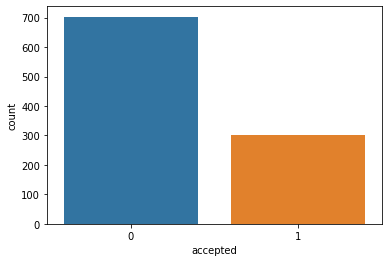

In [10]:
sns.countplot(dataset['accepted'])

#### Note: 

As expected is highly unbalanced, but due to the nature of the request is considered normal.

#### c) Visualizing the numeric data distribution: 

In [11]:
list(set(dataset.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [12]:
dataset_num = dataset.select_dtypes(include = ['float64', 'int64'])
dataset_num.head()

,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,accepted
0,3380.000000,4,4,NaN,2,1,0
1,6940.208336,2,2,22.0,1,1,1
2,1902.370483,2,3,49.0,1,2,0
3,1097.000000,2,4,45.0,1,2,0
4,9021.266894,3,4,53.0,2,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA21ECB308>,
      dtype=object)

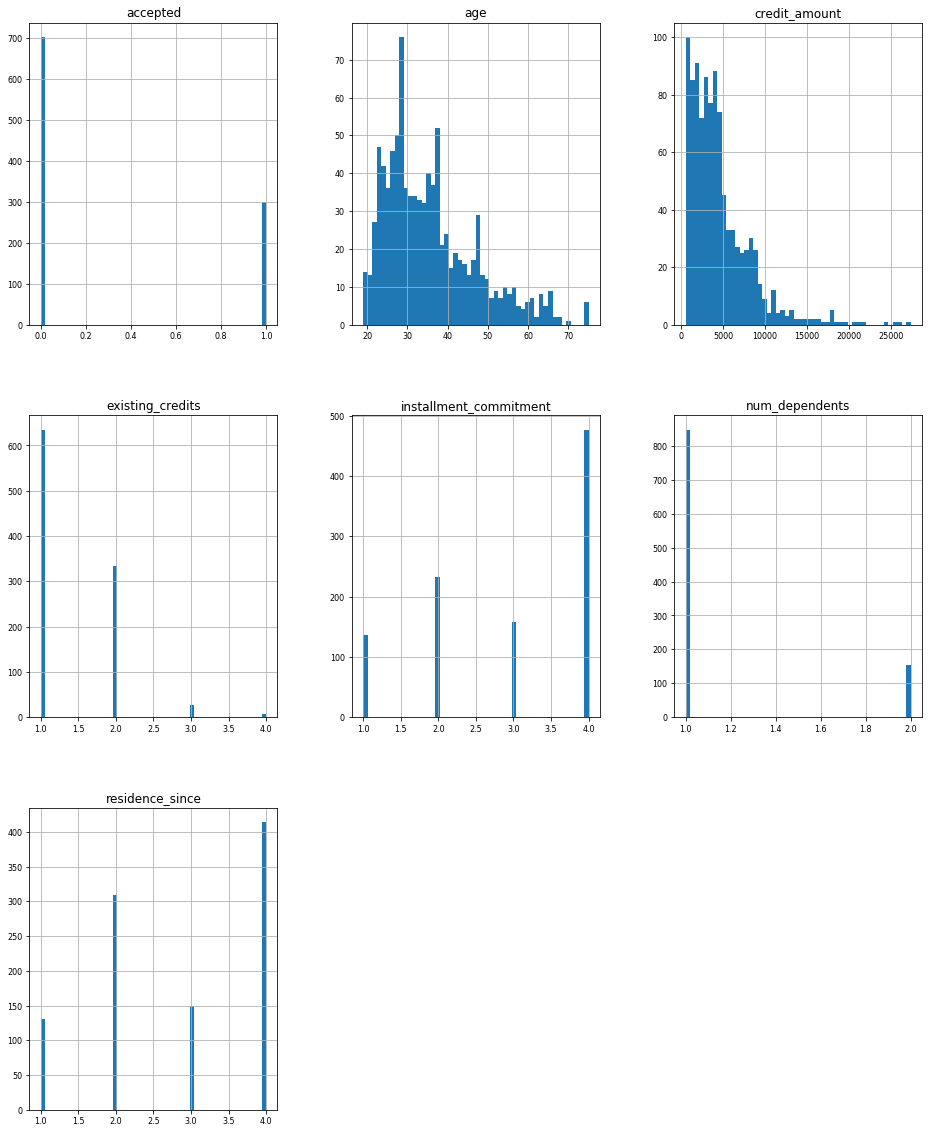

In [13]:
dataset_num.hist(figsize=(16, 20), bins = 50, xlabelsize = 8, ylabelsize = 8)

#### Note:

Features such as 'age' and 'credit amount' are skewed to the right, which is expected since people between 25 - 40 years are most interested for credits.

Also, the credit amount between 1000 to 5000 deutsche mark are most wanted generally among population.

Moreover, 'duration' which is months of payment is more concentrated below 3 years confirming the interest for lower credits.

#### d) Searching for correlation:

Now we will try to find which features are strongly correlated with 'accepted'. 

We will store them in a variable called important_features. 

In [14]:
dataset_num_corr = dataset_num.corr()['accepted'][:-1] # -1 because the lastest row is 'accepted'

important_features = dataset_num_corr[abs(dataset_num_corr) > 0.5].sort_values(ascending = False)

print('There is {} strongly correlated values with accepted:\n{}'.format(len(important_features), important_features))

There is 1 strongly correlated values with accepted:
credit_amount    0.687055
Name: accepted, dtype: float64


#### Note: 

There is only one strongly correlated value, however we know that correlation is affected by outliers, thus we need to take it in cosideration.

Correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights.

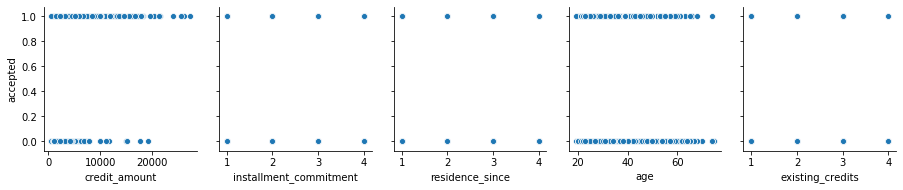

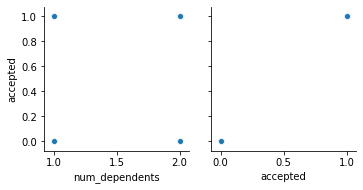

In [15]:
for i in range(0, len(dataset_num.columns), 5):
    sns.pairplot(data = dataset_num,
                x_vars = dataset_num.columns[i:i+5],
                y_vars = ['accepted'])

#### e) Feature to feature relationship:

We can try to see if some variables are linked between each other and then explain their relation with common sense.

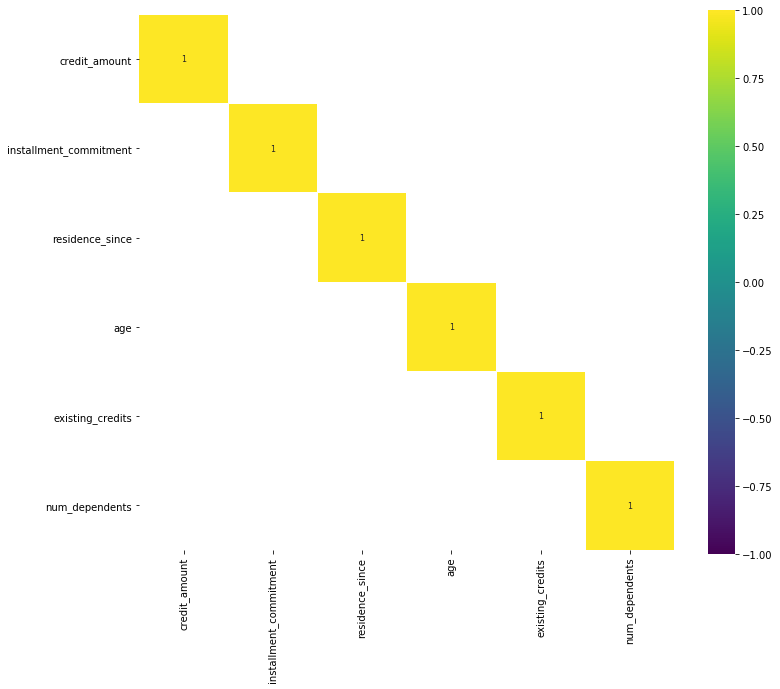

In [16]:
corr = dataset_num.drop('accepted', axis=1).corr() # We already examined 'accepted' correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

#### Note:

There seems to be 'no' connection between the numerical fatures in our dataset.

### 2) Using Univariate variable analysis, detect what is wrong with the following features:

- change_purpose
- change_duration
- checking_status
- personal_status

Hint : use dataframe['feature'].unique()
    
### 3) Fix the problems on the features above:

#### Correction to 'purpose':

In [17]:
dataset['purpose'].unique()

array(['radio/television', 'education', 'furniture/equipment', 'new_car',
       'used_car', 'newcar', 'business', 'usedcar', 'domestic_appliances',
       'repairs', 'other', 'retraining'], dtype=object)

In [18]:
dataset['purpose'] = dataset['purpose'].replace(['newcar', 'usedcar'], ['new_car', 'used_car'])

In [19]:
dataset['purpose'].unique()

array(['radio/television', 'education', 'furniture/equipment', 'new_car',
       'used_car', 'business', 'domestic_appliances', 'repairs', 'other',
       'retraining'], dtype=object)

#### Correction to 'duration':

In [20]:
dataset['duration'].unique()

array(['6', '48', '12', '42', '24', '36', '30', 'None', '15', '9', '10',
       '7', '60', '18`', '45', '11', '27', '8', '54', '20', '14', '33',
       '21', '16', '4', '47', '13', '22', '28', '5', '39', '26', '72',
       '40'], dtype=object)

In [21]:
dataset['duration'].replace(to_replace = 'None', value = np.nan, inplace = True)
dataset['duration'].replace(to_replace = '18`', value = '18', inplace = True)

#### Converting 'duration' to numeric value:

In [22]:
dataset['duration'] = pd.to_numeric(dataset['duration'], errors = 'coerce')

In [23]:
dataset['duration'].unique()

array([ 6., 48., 12., 42., 24., 36., 30., nan, 15.,  9., 10.,  7., 60.,
       18., 45., 11., 27.,  8., 54., 20., 14., 33., 21., 16.,  4., 47.,
       13., 22., 28.,  5., 39., 26., 72., 40.])

#### Correction to 'checking_status':

In [24]:
dataset['checking_status'].unique()

array(['0_checking', 'from_0_to_200', 'None', 'zero_checking',
       'more_than_200', 'from_zero_to_200', 'more_then_200'], dtype=object)

In [25]:
dataset['checking_status'] = dataset['checking_status'].replace(['zero_checking', 'from_zero_to_200', 'more_then_200'],
                                                          ['0_checking', 'from_0_to_200', 'more_than_200'])
dataset['checking_status'].replace(to_replace = 'None', value = np.nan, inplace = True)

In [26]:
dataset['checking_status'].unique()

array(['0_checking', 'from_0_to_200', nan, 'more_than_200'], dtype=object)

#### Correction to 'personal_status':

In [27]:
dataset['personal_status'].unique()

array(['male_single', 'female_divorced/separated/married',
       'male_divorced/separated', 'male_married/widowed',
       'feemale_divorced/separated/married'], dtype=object)

In [28]:
dataset['personal_status'] = dataset['personal_status'].replace(['feemale_divorced/separated/married', 'female_divorced/separated/married'],
                                                          ['female_devorced/separated', 'female_married/widowed'])

In [29]:
dataset['personal_status'].unique()

array(['male_single', 'female_married/widowed', 'male_divorced/separated',
       'male_married/widowed', 'female_devorced/separated'], dtype=object)

### 4) Detect skewed distribution on a numeric variable:

#### Transformation on 'age' right skewed:

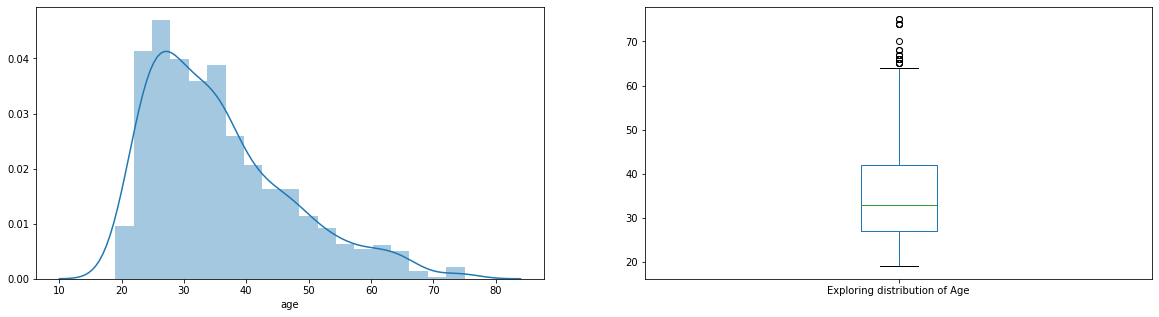

In [30]:
plt.figure(figsize = (20, 5))

plt.subplot(121)
sns.distplot(dataset['age'], label = 'Age')

plt.subplot(122)
dataset['age'].plot(kind = 'box', label = 'Exploring distribution of Age')

In [31]:
dataset['age'].fillna(dataset['age'].mean(), inplace = True)

In [32]:
dataset = dataset.assign(age_norm = np.log(dataset['age'] + 0.1))

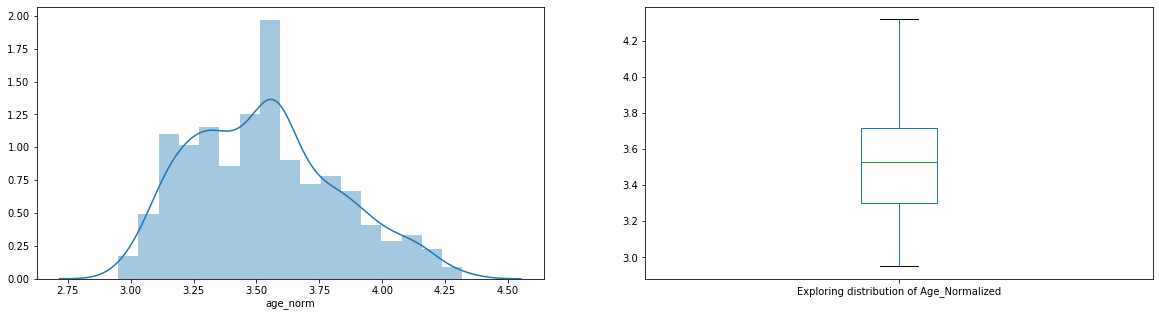

In [33]:
plt.figure(figsize = (20, 5))

plt.subplot(121)
sns.distplot(dataset['age_norm'], label = 'age_normalized')

plt.subplot(122)
dataset['age_norm'].plot(kind = 'box', label = 'Exploring distribution of Age_Normalized')

#### Transformation on 'credit_amount' right skewed:

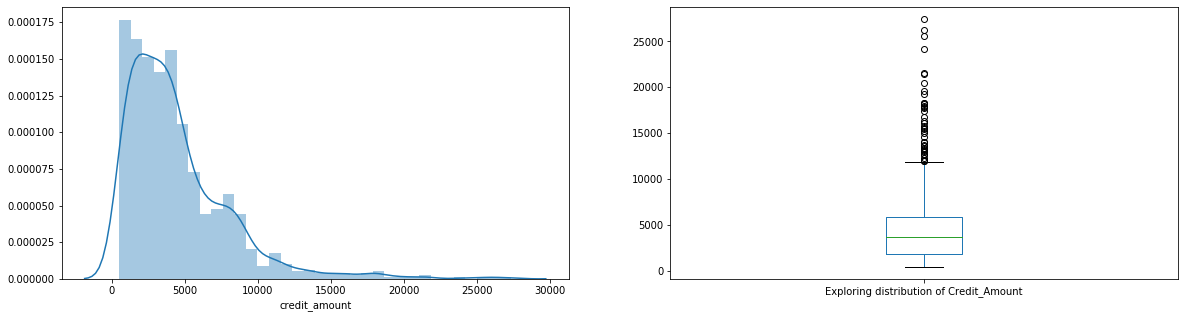

In [34]:
plt.figure(figsize = (20, 5))

plt.subplot(121)
sns.distplot(dataset['credit_amount'], label = 'credit_amount')

plt.subplot(122)
dataset['credit_amount'].plot(kind = 'box', label = 'Exploring distribution of Credit_Amount')

In [35]:
dataset = dataset.assign(credit_amount_norm = np.log(dataset['credit_amount'] + 0.1))

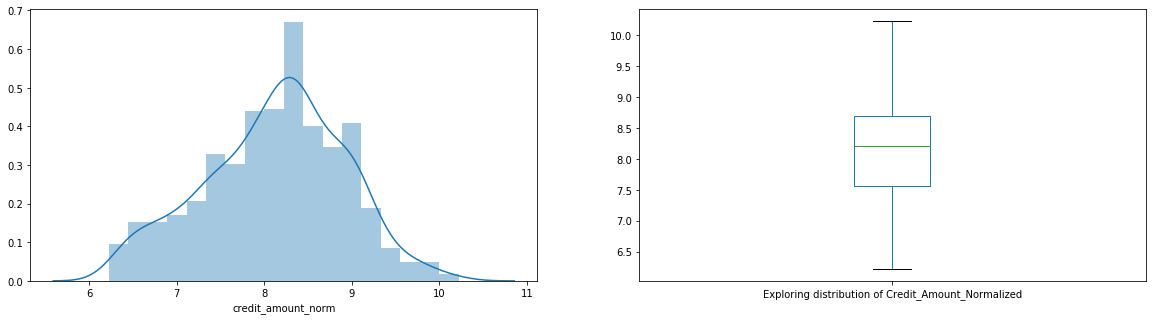

In [36]:
plt.figure(figsize = (20, 5))

plt.subplot(121)
sns.distplot(dataset['credit_amount_norm'], label = 'credit_amount_norm')

plt.subplot(122)
dataset['credit_amount_norm'].plot(kind = 'box', label = 'Exploring distribution of Credit_Amount_Normalized')

#### Transformation on 'duration':

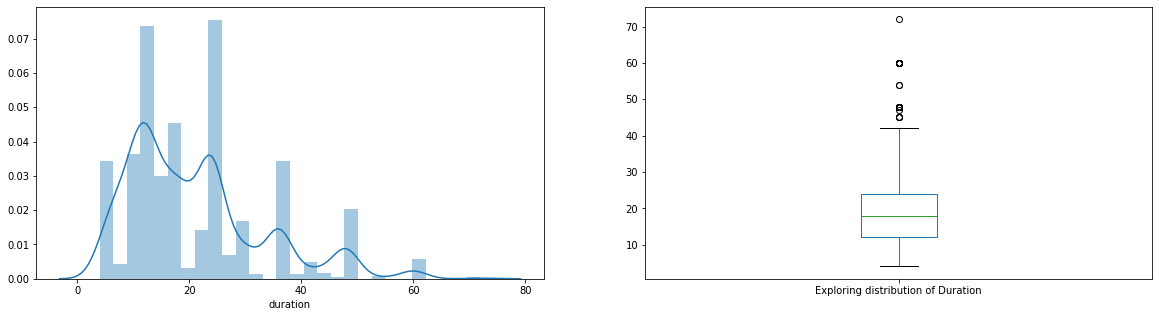

In [37]:
plt.figure(figsize = (20, 5))

plt.subplot(121)
sns.distplot(dataset['duration'], label = 'duration')

plt.subplot(122)
dataset['duration'].plot(kind = 'box', label = 'Exploring distribution of Duration')

In [38]:
dataset['duration'].fillna(dataset['duration'].mean(), inplace = True)

In [39]:
dataset = dataset.assign(duration_norm = np.log(dataset['duration'] + 0.1))

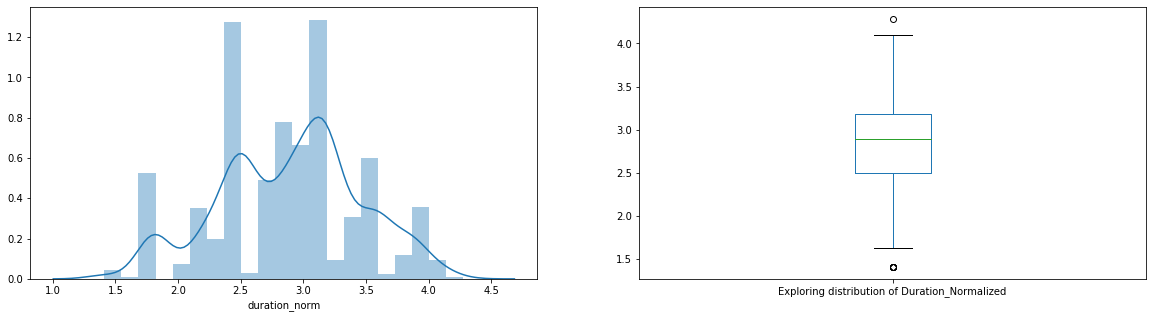

In [40]:
plt.figure(figsize = (20, 5))

plt.subplot(121)
sns.distplot(dataset['duration_norm'], label = 'duration_normalized')

plt.subplot(122)
dataset['duration_norm'].plot(kind = 'box', label = 'Exploring distribution of Duration_Normalized')

### 5) Detect missing values and handle them:

#### a) Check for Numeric and Category columns:

In [41]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

print('Numeric Columns are: ')
print()
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        print(column)
print()
print('______________________________')
print()
print('Category Columns are: ')
print()
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        print(column)

Numeric Columns are: 

duration
credit_amount
installment_commitment
residence_since
age
existing_credits
num_dependents
accepted
age_norm
credit_amount_norm
duration_norm

______________________________

Category Columns are: 

checking_status
credit_history
purpose
savings_status
employment
personal_status
other_parties
property_magnitude
other_payment_plans
housing
job
own_telephone
foreign_worker


#### b) Searching for null:

In [42]:
for column in dataset.columns:
    if dataset[column].isnull().values.any():
        print(column)

checking_status


#### c) Serching for none-like values in the rest of the dataset (Categorical columns):

#### - Column 'credit_history':

In [43]:
dataset['credit_history'].unique()

array(['Critical_acct_other_credits_existing',
       'Existing_credits_paid_till_now', 'Delay_in_past', 'None',
       'No_credits_taken_or_all_paid', 'All_credits_paid_duly'],
      dtype=object)

In [44]:
dataset['credit_history'].replace(to_replace = 'None', value = np.nan, inplace = True)

In [45]:
dataset['credit_history'].unique()

array(['Critical_acct_other_credits_existing',
       'Existing_credits_paid_till_now', 'Delay_in_past', nan,
       'No_credits_taken_or_all_paid', 'All_credits_paid_duly'],
      dtype=object)

#### - Column 'purpose':

In [46]:
dataset['purpose'].unique()

array(['radio/television', 'education', 'furniture/equipment', 'new_car',
       'used_car', 'business', 'domestic_appliances', 'repairs', 'other',
       'retraining'], dtype=object)

#### - Column 'savings_status':

In [47]:
dataset['savings_status'].unique()

array(['Unknown_or_no_savings_acct', '<100DM', '500_to_1000DM', '>1000DM',
       '100_to_500DM'], dtype=object)

#### - Column 'employment': 

In [48]:
dataset['employment'].unique()

array(['>7yrs', '1_to_4yrs', '4_to_7yrs', 'unemployed', '<1yr'],
      dtype=object)

#### - Column 'other_parties':

In [49]:
dataset['other_parties'].unique()

array(['None', 'guarantor', 'co-applicant'], dtype=object)

In [50]:
dataset['other_parties'].replace(to_replace = 'None', value = np.nan, inplace = True)

In [51]:
dataset['other_parties'].unique()

array([nan, 'guarantor', 'co-applicant'], dtype=object)

#### - Column 'property_magnitude':

In [52]:
dataset['property_magnitude'].unique()

array(['real_estate', 'building_society_savings_agreement/life_insurance',
       'unknown/no_property', 'car_or_other_nonsavings'], dtype=object)

In [53]:
dataset['property_magnitude'].replace(to_replace = 'unknown/no_property', value = np.nan, inplace = True)

In [54]:
dataset['property_magnitude'].unique()

array(['real_estate', 'building_society_savings_agreement/life_insurance',
       nan, 'car_or_other_nonsavings'], dtype=object)

#### - Column 'other_payment_plans':

In [55]:
dataset['other_payment_plans'].unique()

array(['none', 'bank', 'stores'], dtype=object)

In [56]:
dataset['other_payment_plans'].replace(to_replace = 'none', value = np.nan, inplace = True)

In [57]:
dataset['other_payment_plans'].unique()

array([nan, 'bank', 'stores'], dtype=object)

#### - Column 'housing':

In [58]:
dataset['housing'].unique()

array(['own', 'for_free', 'rent'], dtype=object)

#### - Column 'job':

In [59]:
dataset['job'].unique()

array(['skilled_employee/official', 'unskilled_resident',
       'management_self-employed_highly_qualified/officer',
       'unemployed/unskilled_nonresident'], dtype=object)

#### - Column 'own_telephone':

In [60]:
dataset['own_telephone'].unique()

array(['yes', 'none'], dtype=object)

In [61]:
dataset['own_telephone'].replace(to_replace = 'none', value = np.nan, inplace = True)

In [62]:
dataset['own_telephone'].unique()

array(['yes', nan], dtype=object)

#### - Column 'foreign_worker':

In [63]:
dataset['foreign_worker'].unique()

array(['yes', 'no'], dtype=object)

#### d) Serching for none-like values in the rest of dataset (Numerical columns):

#### - Column ' installment_commitment':

In [64]:
dataset['installment_commitment'].unique()

array([4, 2, 3, 1], dtype=int64)

#### - Column 'residence_since':

In [65]:
dataset['residence_since'].unique()

array([4, 2, 3, 1], dtype=int64)

#### - Column 'existing_credits':

In [66]:
dataset['existing_credits'].unique()

array([2, 1, 3, 4], dtype=int64)

#### - Column 'num_dependents':

In [67]:
dataset['num_dependents'].unique()

array([1, 2], dtype=int64)

#### e) Checking again for Null values:

In [68]:
for column in dataset.columns:
    if dataset[column].isnull().values.any():
        print(column)

checking_status
credit_history
other_parties
property_magnitude
other_payment_plans
own_telephone


In [69]:
dataset.isna().sum()

checking_status           394
duration                    0
credit_history             50
purpose                     0
credit_amount               0
savings_status              0
employment                  0
installment_commitment      0
personal_status             0
other_parties             910
residence_since             0
property_magnitude        154
age                         0
other_payment_plans       817
housing                     0
existing_credits            0
job                         0
num_dependents              0
own_telephone             598
foreign_worker              0
accepted                    0
age_norm                    0
credit_amount_norm          0
duration_norm               0
dtype: int64

#### f) Filling missing values:

In [70]:
mapper = {'0_checking': 0, 'from_0_to_200': 1,'more_than_200': 2,}
dataset = dataset.assign(checking_status_add = dataset['checking_status'].replace(mapper))

dataset['checking_status_add'].unique()

array([ 0.,  1., nan,  2.])

In [71]:
mapper = {'Critical_acct_other_credits_existing': 0, 'Existing_credits_paid_till_now': 1,
          'Delay_in_past': 2,'No_credits_taken_or_all_paid' : 3, 'All_credits_paid_duly' :4}
dataset = dataset.assign(credit_history_add = dataset['credit_history'].replace(mapper))

dataset['credit_history_add'].unique()

array([ 0.,  1.,  2., nan,  3.,  4.])

In [72]:
mapper = {'guarantor': 0, 'co-applicant': 1}
dataset = dataset.assign(other_parties_add = dataset['other_parties'].replace(mapper))

dataset['other_parties_add'].unique()

array([nan,  0.,  1.])

In [73]:
mapper = {'bank': 0, 'stores': 1}
dataset = dataset.assign(other_payment_plans_add = dataset['other_payment_plans'].replace(mapper))

dataset['other_payment_plans_add'].unique()

array([nan,  0.,  1.])

In [74]:
from sklearn.impute import KNNImputer

transformer = KNNImputer(n_neighbors = 2)

columns = ['checking_status_add', 'credit_history_add', 'other_parties_add','other_payment_plans_add']

dataset[columns] = transformer.fit_transform(dataset[columns])

In [75]:
dataset = dataset.drop(['credit_history','checking_status','other_parties','other_payment_plans'], axis =1)

In [76]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy = 'most_frequent')

columns = ['property_magnitude', 'own_telephone']

dataset[columns] = simple_imputer.fit_transform(dataset[columns])

In [77]:
dataset.isna().sum()

duration                   0
purpose                    0
credit_amount              0
savings_status             0
employment                 0
installment_commitment     0
personal_status            0
residence_since            0
property_magnitude         0
age                        0
housing                    0
existing_credits           0
job                        0
num_dependents             0
own_telephone              0
foreign_worker             0
accepted                   0
age_norm                   0
credit_amount_norm         0
duration_norm              0
checking_status_add        0
credit_history_add         0
other_parties_add          0
other_payment_plans_add    0
dtype: int64

### 6) The rest of the tasks are interchangeably performed downwards:

In [78]:
from sklearn.preprocessing import OneHotEncoder

columns = ['savings_status', 'purpose', 'personal_status', 'housing', 'own_telephone', 'foreign_worker']

transformer = OneHotEncoder(sparse = False)

one_hot_encoded = transformer.fit_transform(dataset[columns]) 

In [79]:
dataset_final = pd.concat([dataset, pd.DataFrame(one_hot_encoded)], axis = 1)

dataset_final = dataset_final.drop(columns, axis = 1)

In [80]:
dataset_final.head(10)

,duration,credit_amount,employment,installment_commitment,residence_since,property_magnitude,age,existing_credits,job,num_dependents,...,16,17,18,19,20,21,22,23,24,25
0,6.0,3380.000000,>7yrs,4,4,real_estate,35.579224,2,skilled_employee/official,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,48.0,6940.208336,1_to_4yrs,2,2,real_estate,22.000000,1,skilled_employee/official,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,12.0,1902.370483,4_to_7yrs,2,3,real_estate,49.000000,1,unskilled_resident,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,42.0,1097.000000,4_to_7yrs,2,4,building_society_savings_agreement/life_insurance,45.000000,1,skilled_employee/official,2,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,24.0,9021.266894,1_to_4yrs,3,4,car_or_other_nonsavings,53.000000,2,skilled_employee/official,2,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
5,36.0,1227.203916,1_to_4yrs,2,4,car_or_other_nonsavings,35.000000,1,unskilled_resident,2,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
6,24.0,1985.000000,>7yrs,3,4,building_society_savings_agreement/life_insurance,53.000000,1,skilled_employee/official,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
7,36.0,2809.000000,1_to_4yrs,2,2,car_or_other_nonsavings,35.000000,1,management_self-employed_highly_qualified/officer,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
8,12.0,2484.663607,4_to_7yrs,2,4,real_estate,61.000000,1,unskilled_resident,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
9,30.0,16324.000000,unemployed,4,2,car_or_other_nonsavings,28.000000,2,management_self-employed_highly_qualified/officer,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [81]:
X = dataset_final.drop(['accepted'], axis = 1)
y = dataset_final['accepted']

In [82]:
cat_features = ['employment', 'job', 'property_magnitude']

In [83]:
import category_encoders as ce

count_encoder = ce.CatBoostEncoder(cols=cat_features)

X[cat_features] = count_encoder.fit_transform(X[cat_features], y)

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [85]:
X_train.head(10)

,duration,credit_amount,employment,installment_commitment,residence_since,property_magnitude,age,existing_credits,job,num_dependents,...,16,17,18,19,20,21,22,23,24,25
68,36.0,8940.000000,0.170939,4,4,0.349976,37.000000,1,0.197598,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
481,24.0,5836.000000,0.375630,4,1,0.276833,35.579224,1,0.261870,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
953,36.0,7475.818502,0.218123,2,1,0.342579,24.000000,2,0.293255,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
436,6.0,2594.427966,0.172716,2,4,0.191660,23.000000,1,0.201152,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
258,15.0,3110.000000,0.322832,1,4,0.367453,23.000000,1,0.259276,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
568,48.0,4772.256022,0.191080,4,1,0.337940,41.000000,2,0.275067,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
587,12.0,4565.000000,0.277885,4,1,0.272215,21.000000,1,0.237384,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
304,48.0,5706.000000,0.245786,2,2,0.341994,44.000000,1,0.252816,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
813,36.0,11207.000000,0.215856,4,4,0.339095,24.000000,2,0.284343,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
941,24.0,3320.000000,0.310310,2,4,0.315710,46.000000,2,0.357240,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [86]:
X_test[cat_features] = count_encoder.transform(X_test[cat_features])

C:\Users\Mitko\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [87]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy',
                              max_depth = 6, 
                              min_samples_leaf = 4,
                              random_state = 0)

tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.2f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.2f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 0.97
Accuracy on the test subset: 0.94


In [88]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(n_estimators = 300,
                              criterion ='gini',
                              min_samples_split = 4,
                              min_samples_leaf = 1,
                              max_features = 10,
                              random_state = 0)

tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.2f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.2f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 0.99
Accuracy on the test subset: 0.94


In [89]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.5, random_state = 0)

ada.fit(X_train, y_train)

print('Accuracy on the training subset: {:.2f}'.format(ada.score(X_train, y_train)))
print('Accuracy on the test subset: {:.2f}'.format(ada.score(X_test, y_test)))

Accuracy on the training subset: 0.97
Accuracy on the test subset: 0.94


In [90]:
from sklearn.metrics import classification_report

y_pred = tree.predict(X_test)

analysis = classification_report(y_test, y_pred)
print(analysis)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       204
           1       0.89      0.94      0.91        97

    accuracy                           0.94       301
   macro avg       0.93      0.94      0.94       301
weighted avg       0.94      0.94      0.94       301



In [91]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[193  11]
 [  6  91]]


### 7) Write a summary :

1) Which model gives the best result?

The results that we received suggest that in this type of data setting all of the model (DecisionTree, RandomForest, AdaBoost) gave almost equal results.
However, SVM on the same setting gave exceptionally bad result, thus pointing out that all clasifiers have favorible problems that they can solve. 


2) What can we improve in the future?

First, we can work on balancing the dataset, using some of the techniques that we learned to level the dataset. 
Second, more digging can be put on the preprocessing of the dataset, searching for more deeper understanding of what the dataset is telling us, or to be more precise what is not telling. 
That unsaid info can be very helpful. 
Finally, puting some more work on correlation among the features, here we can explore the relationships.

3) Which encoding give better performance on this dataset (CatBoost or One-Hot)?

Performance achieved from both settings (CatBoost and One-Hot) are almost equal. A small lead (fraction of percent) has CatBoost encoding. 
But taking everything in consideration we can say that both encoders are equally good for this dataset and setting.
